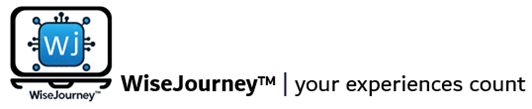

# Why use Excel? Try Python instead!

## 1. Introduction
**Working with Excel files in Python is essential for data analysis and automation**. Excel is widely used in industries for storing structured data, making it crucial to be able to read, manipulate, and analyze it programmatically. In this notebook, we will demonstrate how to load an Excel file using the pandas library and perform basic exploratory data analysis. By inspecting the first and last rows, column names, and dataset dimensions, we can quickly understand the structure of the data. This approach helps us prepare the data for further analysis, such as statistics, visualization, or machine learning.

In this notebook, **we'll explore how to get statistics and visualize our data!!!**

## 2. Open your Excel file
The following code will load an Excel file using Pandas with pd.read_excel(), importing the data into a pandas DataFrame. Then, we will preview the dataset using head() and tail() to display the first and last five rows, helping us quickly understand its structure. Next, we will examine the column names with columns, which provides insight into the available data fields. To get an overview of the dataset’s size, shape will return the number of rows and columns. Finally, we will use **.info()** to check data types, memory usage, and detect any potential formatting or missing value issues.

In [16]:
import pandas as pd

#Read the Excel file and use the name xls_df:
file_path = "/home/marcel/WiseJourney/Test_Data_Open_Excel_file_and_do_statistics.xlsx"
xls_df = pd.read_excel(file_path)

#Print general information about the Excel file:
print('\n', "Head: First five rows in the Excel file")
print('\n', xls_df.head())
print('\n', "Tail: Last five rows in the Excel file")
print('\n', xls_df.tail())
print('\n', '* Columns in the excel file')
print('\n', xls_df.columns)
print('\n', '* Number of Rows, Number of Columns')
print('\n', xls_df.shape, '\n')
print('\n', '* DataFrame information')
print()
xls_df.info()


 Head: First five rows in the Excel file

        col1  col2      col3      col4      col5      col6      col7
0  65.64218     1  0.294768  2.542863  2056.311  11045.42  4.532997
1  65.69501     1  0.294907  2.542072  2053.085  11019.41  4.520152
2  65.76543     1  0.295225  2.540695  2047.664  10984.87  4.498546
3  65.86046     1  0.295722  2.538660  2039.746  10938.50  4.467134
4  65.99607     1  0.296372  2.535887  2028.856  10872.77  4.424570

 Tail: Last five rows in the Excel file

         col1  col2      col3      col4      col5      col6      col7
95  93.98852     1  0.287576  2.320844  1453.123  3858.505  2.111719
96  93.54400     1  0.289002  2.320561  1456.905  3912.475  2.113182
97  93.23273     1  0.290020  2.320292  1459.631  3950.871  2.113737
98  93.09008     2  0.290605  2.319874  1460.986  1586.287  2.112123
99  93.12965     2  0.290769  2.319187  1460.840  1580.697  2.107534

 * Columns in the excel file

 Index(['col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col



**The output of xls_df.info() gives us a detailed overview of the dataset, helping us understand its structure before performing any analysis.** First, we see that the dataset is stored as a Pandas DataFrame and contains 100 rows, indexed from 0 to 99. It has 7 columns, each with 100 non-null values, meaning there are no missing entries. The column names are listed along with their data types, showing that six of them store floating-point numbers (float64), while one contains integers (int64). This tells us that the dataset primarily consists of numerical data, which is useful for statistical operations. Additionally, the memory usage is 5.6 KB, which is relatively small but still important to consider for larger datasets. 

**This summary helps us verify the dataset’s integrity, detect any issues such as missing values, and optimize performance if needed before proceeding with deeper analysis.**

Next, a plot showing the data for each column in the DataFrame **xls_df**

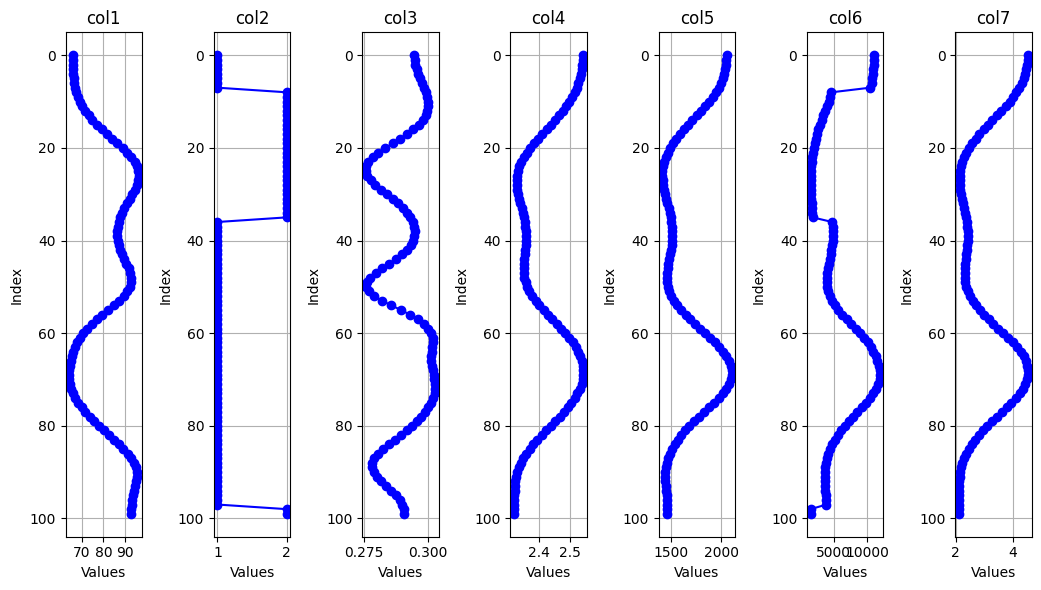

In [78]:
import matplotlib.pyplot as plt

# Set up the figure with subplots, 1 row and 7 columns
plt.figure(figsize=(12, 6))  # Adjust the size if necessary

columns = ['col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7']  # List of column names

# Loop through each column and create a subplot
for i, col in enumerate(columns, 1):
    plt.subplot(1, 8, i)  # 1 row, 7 columns, subplot index i
    plt.plot(xls_df[col], xls_df.index, marker='o', color='b')  # Plot each column
    plt.title(f'{col}')  # Set the title as the column name
    plt.xlabel('Values')  # X-axis label
    plt.ylabel('Index')  # Y-axis label
    plt.grid(True)  # Enable grid
    plt.gca().invert_yaxis()  # Invert the y-axis

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


## 3. Calculate the Statistics of your data

The following code is designed to **compute descriptive statistics for specific columns in a DataFrame and organize the results into a new DataFrame** for easy review. 

We start by defining the columns we want to analyze, then iterate over each column to generate statistical measures such as mean, median, standard deviation, and percentiles (10%, 25%, 50%, and 75%). The **describe() function** from Pandas is used to get these statistics, while custom calculations like the interquartile range (IQR) are done manually. We store each set of statistics in a dictionary and then append it to the results DataFrame. Finally, we set the 'Column' column as the index to organize the data better.

- **Define the columns:** We specify which columns we want to analyze from the original DataFrame.
- **Compute statistics for each column:** We use describe() to calculate common statistics and custom calculations for each column.
- **Create a dictionary for each column's statistics:** A dictionary is used to store the calculated statistics for each column.
- **Append the results:** We concatenate the dictionary to a new DataFrame.
- **Set 'Column' as the index:** Finally, we set the 'Column' column as the index for better readability.

In [24]:
# List of columns for which we will calculate statistics
columns = ['col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7']

# New empty DataFrame with the desired columns
df_describe = pd.DataFrame(columns=['Column', 'Count', 'Std Dev', 'Mean', 'Min', 'Max', 'Median', 'Mode', 'P10', 'P25', 'P50', 'P75', 'Q1', 'Q3', 'IQR'])

# Loop through each column to calculate the statistics
for col in columns:
    stats = xls_df[col].describe(percentiles=[0.1, 0.25, 0.5, 0.75])
    q1 = stats['25%']
    q3 = stats['75%']
    iqr = q3 - q1

    # Create a dictionary with the statistics
    row = {'Column': col,
           'Count': stats['count'],
           'Std Dev': stats['std'],
           'Mean': stats['mean'],
           'Min': stats['min'],
           'Max': stats['max'],
           'Median': stats['50%'],
           'Mode': stats.mode().iloc[0],  # To calculate the mode
           'P10': stats['10%'],
           'P25': stats['25%'],
           'P50': stats['50%'],
           'P75': stats['75%'],
           'Q1': stats['25%'],
           'Q3': stats['75%'],
           'IQR': iqr}
    
    # Concatenate the new row to the DataFrame
    df_describe = pd.concat([df_describe, pd.DataFrame([row])], ignore_index=True)

# Set the "Column" column as the index
df_describe = df_describe.set_index('Column')

# Display the New DataFrame "df_describe" with descriptive statistics
df_describe

/tmp/ipykernel_10696/2711969696.py:32: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_describe = pd.concat([df_describe, pd.DataFrame([row])], ignore_index=True)


,Count,Std Dev,Mean,Min,Max,Median,Mode,P10,P25,P50,P75,Q1,Q3,IQR
Column,,,,,,,,,,,,,,
col1,100.0,11.463771,81.644796,63.993980,96.502630,86.529590,11.463771,65.758388,69.043882,86.529590,92.446877,69.043882,92.446877,23.402995
col2,100.0,0.460566,1.300000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000
col3,100.0,0.008614,0.290897,0.275800,0.302881,0.291947,0.008614,0.278274,0.283241,0.291947,0.298758,0.283241,0.298758,0.015516
col4,100.0,0.080053,2.416119,2.319187,2.544308,2.386626,0.080053,2.328249,2.349945,2.386626,2.498386,2.349945,2.498386,0.148441
col5,100.0,237.500785,1662.214160,1408.773000,2105.231000,1529.735500,100.000000,1441.149900,1460.949500,1529.735500,1882.232000,1460.949500,1882.232000,421.282500
col6,100.0,3371.701399,5658.035550,1580.697000,11899.830000,4472.844500,100.000000,1732.368200,3623.374250,4472.844500,8652.324500,3623.374250,8652.324500,5028.950250
col7,100.0,0.868176,3.017887,2.107534,4.532997,2.585304,0.868176,2.139598,2.303853,2.585304,3.844266,2.303853,3.844266,1.540413


## 4. Visualize the data

Before starting, it's important to **import the necessary libraries to visualize data effectively**. For this, we use **matplotlib.pyplot** and **seaborn**. matplotlib.pyplot is a popular library for creating static, interactive, and animated visualizations in Python. It provides functions for plotting various types of charts, such as line graphs, bar charts, histograms, and scatter plots. seaborn, built on top of matplotlib, is another powerful library that simplifies the creation of attractive and informative statistical graphics. It comes with built-in themes and tools for creating more complex visualizations, like heatmaps, boxplots, and pair plots, often with less code than matplotlib. Together, these libraries are essential for effective data visualization.

### Example 1: Box Plots
A **box plot**, also known as a **box-and-whisker plot**, is a graphical representation of the distribution of a dataset. It displays the minimum, first quartile (Q1), median (Q2), third quartile (Q3), and maximum values of the data, as well as potential outliers. The "box" represents the interquartile range (IQR), which is the range between Q1 and Q3, while the "whiskers" extend from the box to the minimum and maximum values, excluding outliers. Outliers are typically shown as individual points beyond the whiskers. Box plots provide a compact summary of a dataset’s spread and central tendency.

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

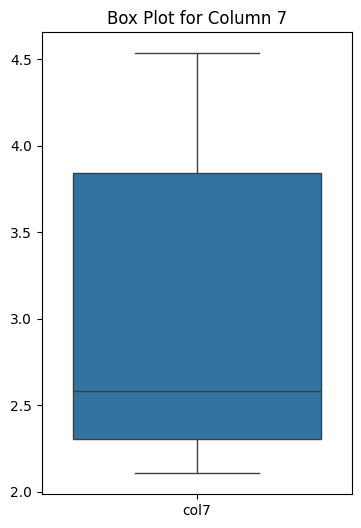

In [68]:
#This example of box plots will show only column 7, you can change the name to display other columns
plt.figure(figsize=(4, 6))
sns.boxplot(data=xls_df[['col7']]) 
plt.title('Box Plot for Column 7')
plt.show()

### Example 2: Histograms
A **histogram** is a graphical representation of data distribution, where bars represent the frequency of data points within specific intervals or "bins." The x-axis shows the value range, while the y-axis shows the count of values in each bin. A density curve can be added to visualize the probability distribution of the data, helping to identify patterns like skewness, central tendency, and outliers. Histograms are useful for understanding the spread and shape of a dataset.

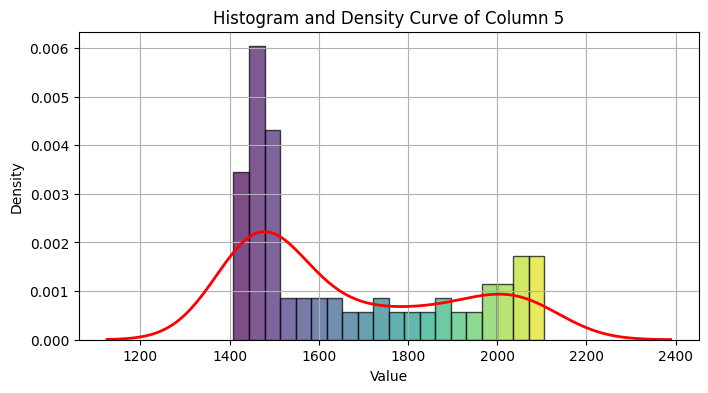

In [64]:
# Plotting histogram with different colors for each bin
plt.figure(figsize=(8, 4))

# Create the histogram with 20 bins
counts, bins, patches = plt.hist(xls_df['col5'], bins=20, alpha=0.7, edgecolor='black', density=True)

# Set different colors for each bin
for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.viridis(i / len(patches)))  # Change 'viridis' to any color map

# Plotting density curve
sns.kdeplot(xls_df['col5'], color='red', lw=2)

# Adding titles, labels, and grid
plt.title('Histogram and Density Curve of Column 5')
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True)

# Show the limits of each bin on the x-axis, but only for bins with counts > 0.01
for i in range(len(bins) - 1):
    if counts[i] > 0.01:  # Adjust this threshold value as needed
        plt.text((bins[i] + bins[i + 1]) / 2, counts[i], f'{counts[i]:.2f}', 
                 ha='center', va='bottom', fontsize=10)

# Display the plot
plt.show()

### Example 3: Heatmaps
A **heatmap** is a data visualization technique that uses colors to represent the values in a matrix or table, making it easier to spot patterns, correlations, and outliers. Each cell's color corresponds to a specific value, with a gradient scale to indicate the range of values, such as from low (cool colors) to high (warm colors). Heatmaps are commonly used to display relationships between variables, with applications in fields like statistics, data science, and geography, helping to reveal trends and anomalies in large datasets.

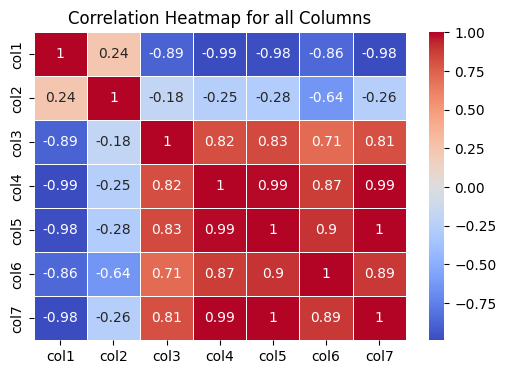

In [65]:
plt.figure(figsize=(6, 4))
sns.heatmap(xls_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for all Columns')
plt.show()

## 4. Conclusion
We explored key steps involved in working with Excel files in Python using the pandas library. The process begins by loading an Excel file into a pandas DataFrame and quickly inspecting the data using methods like head(), tail(), and info() to understand its structure, dimensions, and detect any issues such as missing values. After ensuring the data is intact, we compute descriptive statistics for specific columns, including mean, median, standard deviation, and percentiles, and organize these results into a new DataFrame for easy review. Finally, we highlight the importance of visualizing the data using libraries like matplotlib and seaborn, which facilitate the creation of various plots and statistical graphics, such as line graphs, histograms, and heatmaps. These tools allow for effective exploration and presentation of your data, enabling deeper insights and analysis.

In [79]:
print('WiseJourney','\N{TRADE MARK SIGN}')
print('Author: Marcel Ferran Castro Ponce de Leon') 
print('Date: Jan, 29th, 2025') 
print('Version: 1') 

WiseJourney ™
Author: Marcel Ferran Castro Ponce de Leon
Date: Jan, 29th, 2025
Version: 1
